In [ ]:
#importing libraries
import numpy as np
import pandas as pd

# EDA

In [ ]:
# Load Dataset from Parquet
df = pd.read_parquet("/content/preprocessed_fraudTrain.parquet", engine="pyarrow")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,trans_date_trans_time,merchant,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,distance,customer_id,time_since_last_transaction,hour,hour_std_dev,week,month,transaction_frequency_per_day,num_transactions_last_7d,num_transactions_last_24h,num_transactions_last_1h,avg_transaction_distance,90th_dist,above_avg_distance,above_90_distance,repeat_merchant,new_merchant_flag,unique_merchants_last_30d,avg_spending_per_week,avg_amt_per_day,avg_trans_amt,transaction_amt_std_dev,90th_amt,above_avg_amt,above_90_amt,is_rounded_amt,age,city_population_risk_score,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,"Rippin, Kub and Mann",4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,78.597568,1,0.0,0,6.496407,1,1,3,1,1,1,77.960192,115.367543,1,0,0,1,0,4.970000,45.436667,87.393215,126.596221,201.562,0,0,0,30,0.001202,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1565,2019-01-01 16:53:34,Ruecker-Mayert,114.79,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,35.083586,-80.625951,0,121.405859,1,60796.0,16,6.496407,1,1,3,2,2,1,77.960192,115.367543,1,1,0,1,1,59.880000,45.436667,87.393215,126.596221,201.562,1,0,0,30,0.001202,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2299,2019-01-01 23:02:37,Pacocha-Weissnat,16.55,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,35.532409,-82.170017,0,108.131953,1,22143.0,23,6.496407,1,1,3,3,3,1,77.960192,115.367543,1,0,0,1,2,45.436667,45.436667,87.393215,126.596221,201.562,0,0,0,30,0.001202,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3606,2019-01-03 01:40:38,Kuhn LLC,27.70,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,35.315851,-80.666723,0,96.589551,1,95881.0,1,6.496407,3,1,2,4,1,1,77.960192,115.367543,1,0,0,1,3,41.002500,35.710000,87.393215,126.596221,201.562,0,0,0,30,0.001202,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4227,2019-01-03 15:24:11,"Nicolas, Hills and McGlynn",43.72,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.956094,-80.343520,0,122.793623,1,49413.0,15,6.496407,3,1,2,5,2,1,77.960192,115.367543,1,1,0,1,4,41.546000,35.710000,87.393215,126.596221,201.562,0,0,0,30,0.001202,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'is_fraud', 'distance', 'customer_id', 'time_since_last_transaction',
       'hour', 'hour_std_dev', 'week', 'month',
       'transaction_frequency_per_day', 'num_transactions_last_7d',
       'num_transactions_last_24h', 'num_transactions_last_1h',
       'avg_transaction_distance', '90th_dist', 'above_avg_distance',
       'above_90_distance', 'repeat_merchant', 'new_merchant_flag',
       'unique_merchants_last_30d', 'avg_spending_per_week', 'avg_amt_per_day',
       'avg_trans_amt', 'transaction_amt_std_dev', '90th_amt', 'above_avg_amt',
       'above_90_amt', 'is_rounded_amt', 'age', 'city_population_risk_score',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pet

In [ ]:
# Checking for null values
df.isna().sum()

,0
trans_date_trans_time,0
merchant,0
amt,0
gender,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


In [ ]:
# dropping 'trans_date_trans_time', 'merchant', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'customer_id'
columns_to_drop = ['trans_date_trans_time', 'merchant', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'customer_id']
df.drop(columns = columns_to_drop, inplace = True)

In [ ]:
df.head()

,amt,is_fraud,distance,time_since_last_transaction,hour,hour_std_dev,week,month,transaction_frequency_per_day,num_transactions_last_7d,num_transactions_last_24h,num_transactions_last_1h,avg_transaction_distance,90th_dist,above_avg_distance,above_90_distance,repeat_merchant,new_merchant_flag,unique_merchants_last_30d,avg_spending_per_week,avg_amt_per_day,avg_trans_amt,transaction_amt_std_dev,90th_amt,above_avg_amt,above_90_amt,is_rounded_amt,age,city_population_risk_score,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,78.597568,0.0,0,6.496407,1,1,3,1,1,1,77.960192,115.367543,1,0,0,1,0,4.970000,45.436667,87.393215,126.596221,201.562,0,0,0,30,0.001202,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1565,114.79,0,121.405859,60796.0,16,6.496407,1,1,3,2,2,1,77.960192,115.367543,1,1,0,1,1,59.880000,45.436667,87.393215,126.596221,201.562,1,0,0,30,0.001202,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2299,16.55,0,108.131953,22143.0,23,6.496407,1,1,3,3,3,1,77.960192,115.367543,1,0,0,1,2,45.436667,45.436667,87.393215,126.596221,201.562,0,0,0,30,0.001202,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3606,27.70,0,96.589551,95881.0,1,6.496407,3,1,2,4,1,1,77.960192,115.367543,1,0,0,1,3,41.002500,35.710000,87.393215,126.596221,201.562,0,0,0,30,0.001202,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4227,43.72,0,122.793623,49413.0,15,6.496407,3,1,2,5,2,1,77.960192,115.367543,1,1,0,1,4,41.546000,35.710000,87.393215,126.596221,201.562,0,0,0,30,0.001202,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)

<ipython-input-9-608a043156cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)
<ipython-input-9-608a043156cc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)


In [ ]:
df['gender'].unique()

array([1, 0])

In [ ]:
df.shape

(1296675, 44)

In [ ]:
pd.options.display.max_columns = None
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1282873
Data columns (total 43 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   amt                            1296675 non-null  float64
 1   is_fraud                       1296675 non-null  int64  
 2   distance                       1296675 non-null  float64
 3   time_since_last_transaction    1296675 non-null  float64
 4   hour                           1296675 non-null  int32  
 5   hour_std_dev                   1296675 non-null  float64
 6   week                           1296675 non-null  int32  
 7   month                          1296675 non-null  int32  
 8   transaction_frequency_per_day  1296675 non-null  int64  
 9   num_transactions_last_7d       1296675 non-null  int64  
 10  num_transactions_last_24h      1296675 non-null  int64  
 11  num_transactions_last_1h       1296675 non-null  int64  
 12  avg_transaction_dis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,1296675.0,70.351035,160.316039,1.000000,9.650000,47.520000,83.140000,2.894890e+04
is_fraud,1296675.0,0.005789,0.075863,0.000000,0.000000,0.000000,0.000000,1.000000e+00
distance,1296675.0,76.114651,29.116935,0.022255,55.334913,78.231751,98.503268,1.521172e+02
time_since_last_transaction,1296675.0,32460.388633,47391.441671,0.000000,5996.000000,16536.000000,40195.000000,1.341471e+06
hour,1296675.0,12.804858,6.817824,0.000000,7.000000,14.000000,19.000000,2.300000e+01
hour_std_dev,1296675.0,6.643931,0.314121,0.527046,6.477901,6.621047,6.902229,1.138216e+01
week,1296675.0,3.070604,2.198153,0.000000,1.000000,3.000000,5.000000,6.000000e+00
month,1296675.0,6.142150,3.417703,1.000000,3.000000,6.000000,9.000000,1.200000e+01
transaction_frequency_per_day,1296675.0,4.998114,3.195478,1.000000,3.000000,4.000000,7.000000,3.400000e+01
num_transactions_last_7d,1296675.0,26.099143,13.896524,1.000000,16.000000,24.000000,34.000000,1.060000e+02


# Distribution of dataset
Analyze the distribution of my features and decide which scaling method to apply.
1. MinMax Scaling (scales between 0 and 1) or
2. Standard Scaling (mean = 0, std = 1).

Which to choose?
* If features have a Gaussian-like distribution → StandardScaler.
* If features have varying ranges → MinMaxScaler.

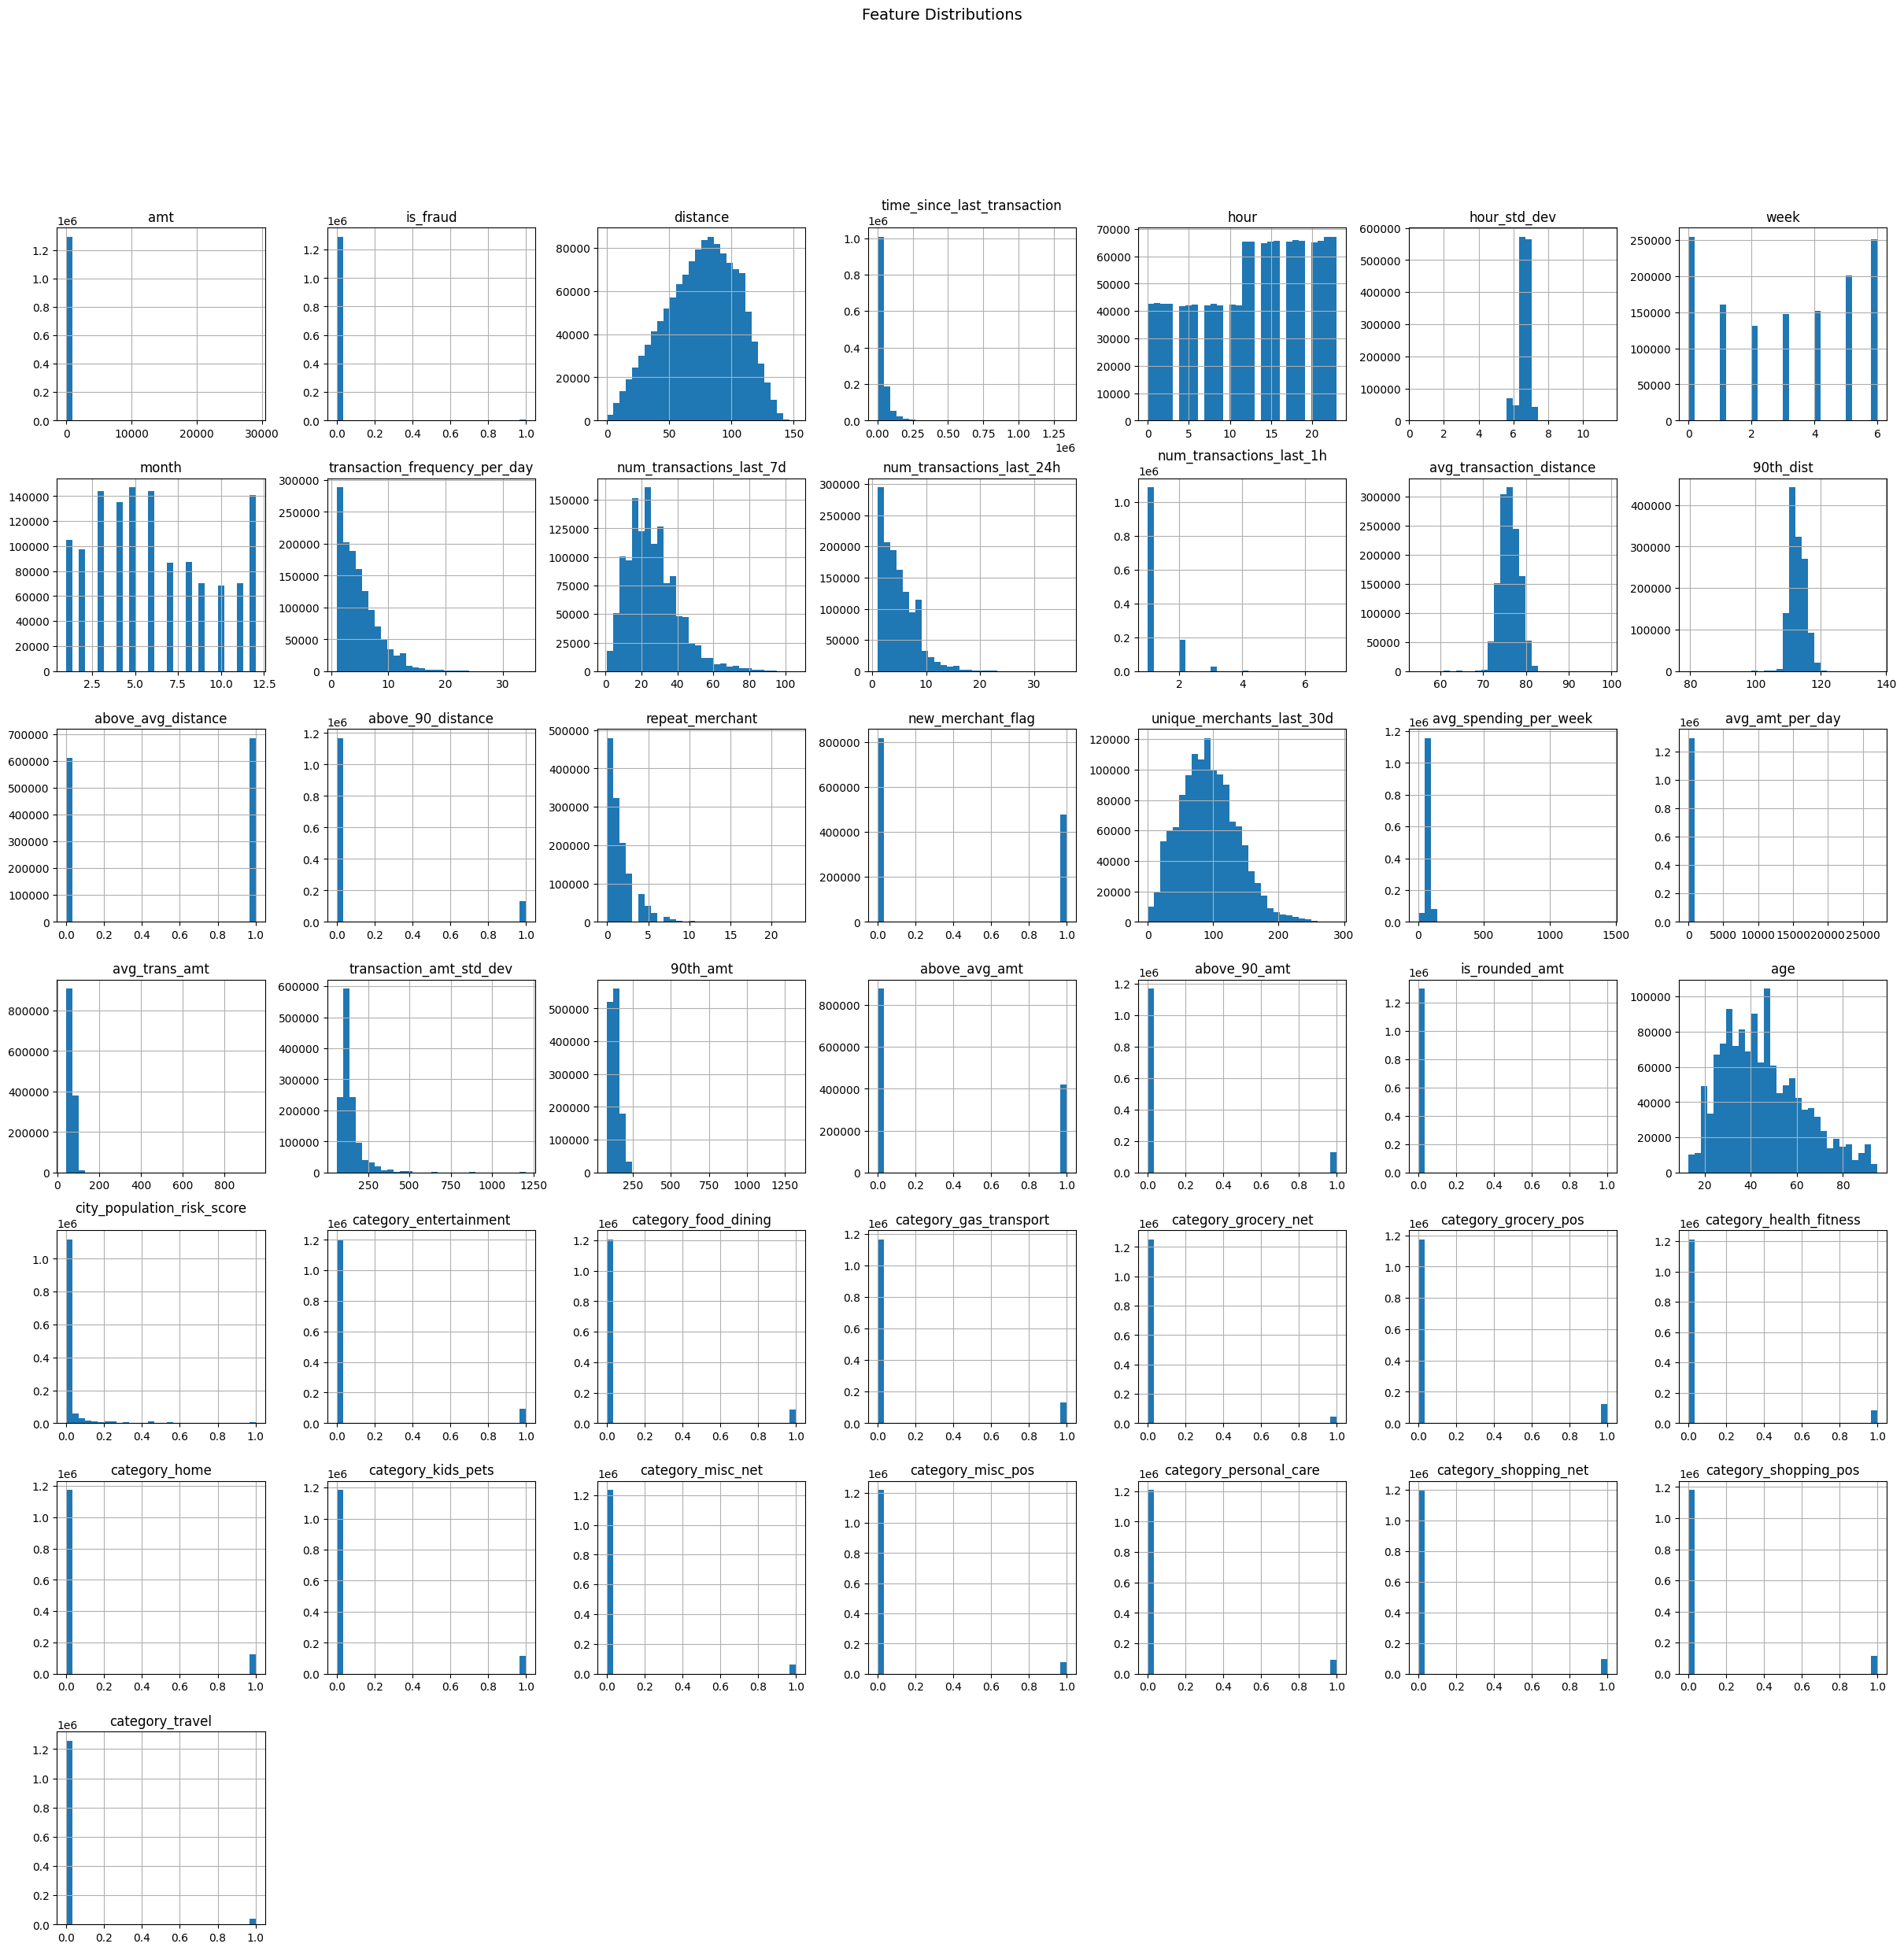

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Feature Distributions
df.hist(figsize=(30, 28), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis for all numeric features
distribution_summary = pd.DataFrame({
    "Skewness": df.skew(),
    "Kurtosis": df.kurtosis()
})

# Define threshold for normality
def classify_distribution(skew_val, kurt_val):
    if abs(skew_val) < 0.5 and 2.5 < kurt_val < 3.5:
        return "Normal"
    elif skew_val > 1:
        return "Right-Skewed"
    elif skew_val < -1:
        return "Left-Skewed"
    elif kurt_val > 3.5:
        return "Leptokurtic (Peaked)"
    elif kurt_val < 2.5:
        return "Platykurtic (Flat)"
    return "Other"

# Apply classification
distribution_summary["Distribution Type"] = distribution_summary.apply(
    lambda row: classify_distribution(row["Skewness"], row["Kurtosis"]), axis=1
)

# Display results
print(distribution_summary)

                                Skewness     Kurtosis     Distribution Type
amt                            42.277874  4545.644979          Right-Skewed
gender                         -0.190655    -1.963654    Platykurtic (Flat)
is_fraud                       13.029122   167.758272          Right-Skewed
distance                       -0.236208    -0.633219    Platykurtic (Flat)
time_since_last_transaction     4.278671    31.993970          Right-Skewed
hour                           -0.282825    -1.079580    Platykurtic (Flat)
hour_std_dev                   -0.309782     9.460281  Leptokurtic (Peaked)
week                           -0.078453    -1.445049    Platykurtic (Flat)
month                           0.298516    -1.047546    Platykurtic (Flat)
transaction_frequency_per_day   1.430055     3.327027          Right-Skewed
num_transactions_last_7d        1.002311     1.558812          Right-Skewed
num_transactions_last_24h       1.402205     3.216647          Right-Skewed
num_transact

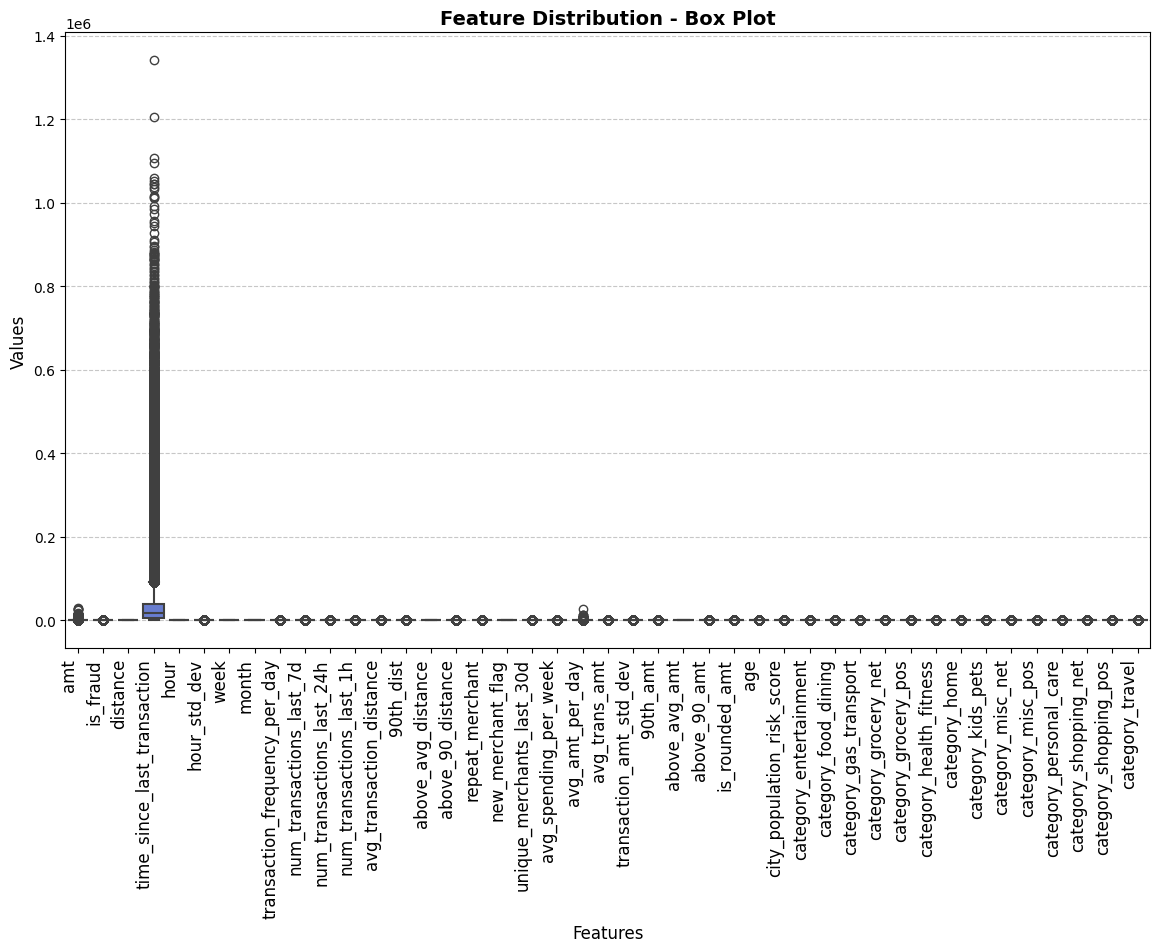

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better visibility
plt.figure(figsize=(14, 8))

# Create a box plot with improved aesthetics
sns.boxplot(data=df, palette="coolwarm", linewidth=1.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right", fontsize=12)  # Rotate and align labels

# Add title and labels
plt.title("Feature Distribution - Box Plot", fontsize=14, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Add grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# Standardization/Normalization of Features

In [ ]:
# Identify binary features (only contain 0 and 1)
binary_features = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]

print("Binary Features:", binary_features)

Binary Features: ['is_fraud', 'above_avg_distance', 'above_90_distance', 'new_merchant_flag', 'above_avg_amt', 'above_90_amt', 'is_rounded_amt', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']


In [ ]:
# 4. Dividing the dataset into two parts
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

In [ ]:
X.shape

(1296675, 42)

In [ ]:
y.value_counts()

,count
is_fraud,
0,1289169
1,7506


In [ ]:
X.columns

Index(['amt', 'distance', 'time_since_last_transaction', 'hour',
       'hour_std_dev', 'week', 'month', 'transaction_frequency_per_day',
       'num_transactions_last_7d', 'num_transactions_last_24h',
       'num_transactions_last_1h', 'avg_transaction_distance', '90th_dist',
       'above_avg_distance', 'above_90_distance', 'repeat_merchant',
       'new_merchant_flag', 'unique_merchants_last_30d',
       'avg_spending_per_week', 'avg_amt_per_day', 'avg_trans_amt',
       'transaction_amt_std_dev', '90th_amt', 'above_avg_amt', 'above_90_amt',
       'is_rounded_amt', 'age', 'city_population_risk_score',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='obje

In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler

# Select only numerical features that need scaling (excluding binary & one-hot encoded)
numerical_features = [
    'amt', 'distance', 'time_since_last_transaction', 'hour','hour_std_dev', 'week', 'month',
    'transaction_frequency_per_day','num_transactions_last_7d', 'num_transactions_last_24h',
    'num_transactions_last_1h', 'avg_transaction_distance', '90th_dist','repeat_merchant',
    'unique_merchants_last_30d','avg_spending_per_week', 'avg_amt_per_day', 'avg_trans_amt',
    'transaction_amt_std_dev', '90th_amt', 'age', 'city_population_risk_score'
 ]

# Apply MinMax Scaling
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# No scaling needed for binary & one-hot encoded features

In [ ]:
X.head()

,amt,distance,time_since_last_transaction,hour,hour_std_dev,week,month,transaction_frequency_per_day,num_transactions_last_7d,num_transactions_last_24h,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0.000137,0.516620,0.000000,0.000000,0.549912,0.166667,0.0,0.060606,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
1565,0.003931,0.798078,0.045320,0.695652,0.549912,0.166667,0.0,0.060606,0.009524,0.028571,...,0,0,0,1,0,0,0,0,0,0
2299,0.000537,0.710804,0.016507,1.000000,0.549912,0.166667,0.0,0.060606,0.019048,0.057143,...,0,0,0,1,0,0,0,0,0,0
3606,0.000922,0.634915,0.071475,0.043478,0.549912,0.500000,0.0,0.030303,0.028571,0.000000,...,0,0,0,0,1,0,0,0,0,0
4227,0.001476,0.807202,0.036835,0.652174,0.549912,0.500000,0.0,0.030303,0.038095,0.028571,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,1296675.0,0.002396,0.005538,0.0,0.000299,0.001607,0.002838,1.0
distance,1296675.0,0.500295,0.191439,0.0,0.363672,0.514215,0.647497,1.0
time_since_last_transaction,1296675.0,0.024198,0.035328,0.0,0.004470,0.012327,0.029963,1.0
hour,1296675.0,0.556733,0.296427,0.0,0.304348,0.608696,0.826087,1.0
hour_std_dev,1296675.0,0.563503,0.028938,0.0,0.548208,0.561394,0.587298,1.0
week,1296675.0,0.511767,0.366359,0.0,0.166667,0.500000,0.833333,1.0
month,1296675.0,0.467468,0.310700,0.0,0.181818,0.454545,0.727273,1.0
transaction_frequency_per_day,1296675.0,0.121155,0.096833,0.0,0.060606,0.090909,0.181818,1.0
num_transactions_last_7d,1296675.0,0.239039,0.132348,0.0,0.142857,0.219048,0.314286,1.0
num_transactions_last_24h,1296675.0,0.110977,0.088061,0.0,0.057143,0.085714,0.142857,1.0


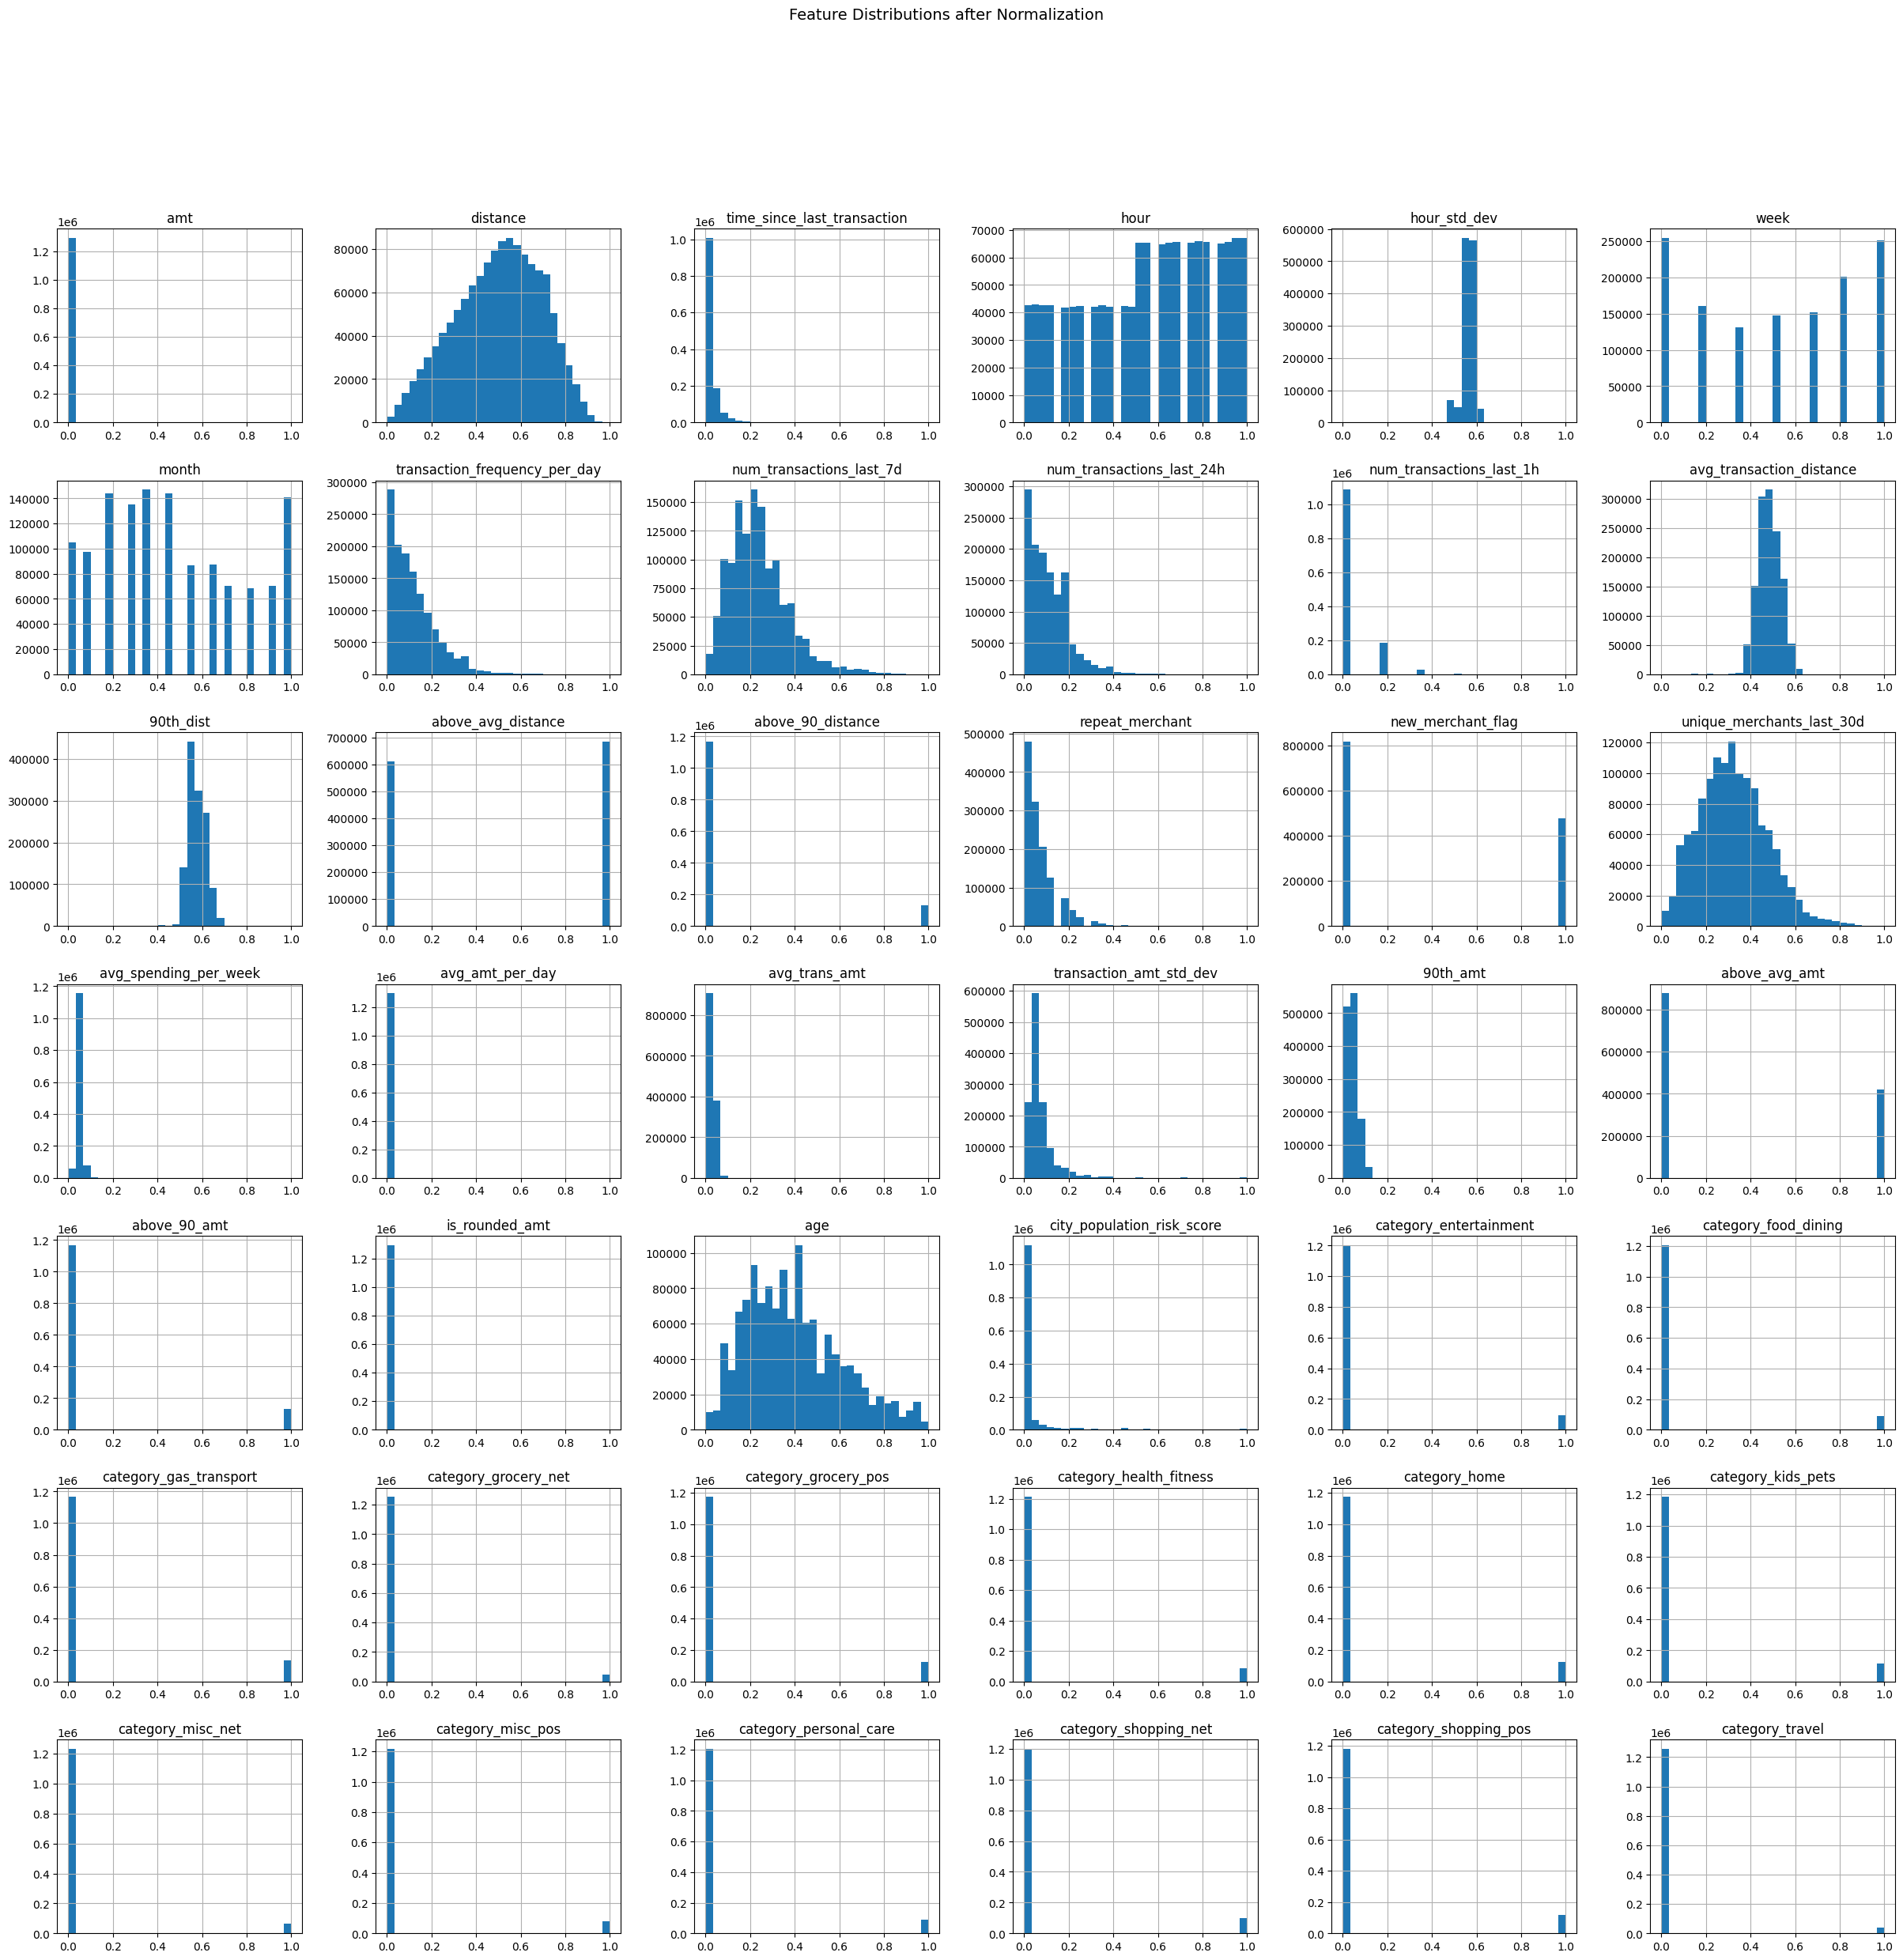

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Feature Distributions
X.hist(figsize=(30, 28), bins=30)
plt.suptitle("Feature Distributions after Normalization", fontsize=14)
plt.show()

# Data type conversion

In [ ]:
print(X.dtypes.value_counts())  # Shows count of each data type

float64    22
uint8      14
int64       6
Name: count, dtype: int64


In [ ]:
print(y.dtypes)  # Shows count of each data type

int64


In [ ]:
X = X.astype('float32')
# y = y.astype('int')  # Target should stay as int (for classification)

In [ ]:
print(X.dtypes)  # Check all are float32
print(X.isna().sum().sum())  # Ensure no missing values

amt                              float32
distance                         float32
time_since_last_transaction      float32
hour                             float32
hour_std_dev                     float32
week                             float32
month                            float32
transaction_frequency_per_day    float32
num_transactions_last_7d         float32
num_transactions_last_24h        float32
num_transactions_last_1h         float32
avg_transaction_distance         float32
90th_dist                        float32
above_avg_distance               float32
above_90_distance                float32
repeat_merchant                  float32
new_merchant_flag                float32
unique_merchants_last_30d        float32
avg_spending_per_week            float32
avg_amt_per_day                  float32
avg_trans_amt                    float32
transaction_amt_std_dev          float32
90th_amt                         float32
above_avg_amt                    float32
above_90_amt    

# Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((1037340, 42), (259335, 42))

In [ ]:
y_train.shape, y_test.shape

((1037340,), (259335,))

In [ ]:
# Converting pandas df into np array

# X_train = np.array(X_train, dtype=np.float32)
# X_test = np.array(X_test, dtype=np.float32)
# y_train = np.array(y_train, dtype=np.int32)
# y_test = np.array(y_test, dtype=np.int32)

In [ ]:
# X.shape

(54006, 542)

# Building ANN

In [ ]:
# Calculating class imbalance
fraud_ratio = np.sum(y_train) / len(y_train)
print(f"Fraud Ratio in Training Set: {fraud_ratio:.4f}")

Fraud Ratio in Training Set: 0.0058


In [ ]:
# Adjusting class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print(class_weights_dict)

{0: 0.502911275191863, 1: 86.37302248126561}


# Model 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
model1 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping to stop training when validation loss stops improving.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_dict,  # {0: 0.502911275191863, 1: 86.37302248126561}
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - AUC: 0.8902 - accuracy: 0.7949 - loss: 0.4142 - val_AUC: 0.9782 - val_accuracy: 0.9149 - val_loss: 0.2187
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - AUC: 0.9768 - accuracy: 0.9211 - loss: 0.1932 - val_AUC: 0.9913 - val_accuracy: 0.9638 - val_loss: 0.1149
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - AUC: 0.9889 - accuracy: 0.9560 - loss: 0.1303 - val_AUC: 0.9951 - val_accuracy: 0.9829 - val_loss: 0.0705
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9922 - accuracy: 0.9664 - loss: 0.1049 - val_AUC: 0.9956 - val_accuracy: 0.9887 - val_loss: 0.0544
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9936 - accuracy: 0.9714 - loss: 0.0946 - val_AUC: 0.9962 - val_accuracy: 0.9715 - val_loss: 0.0957
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9940 - accuracy: 0.9740 - loss: 0.0882 - val_AUC: 0.9970 - val_accuracy: 0.9883 - val_loss: 0.0492
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.9954 - accuracy: 0.9935 - loss: 0.0258
Test Accuracy: 99.3525743484497
Test AUC: 0.9964


# Model 1 prediction probabilities with decision threshold = 0.5

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = model1.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9998    0.9882    0.9939    257834
           1     0.3222    0.9667    0.4833      1501

    accuracy                         0.9880    259335
   macro avg     0.6610    0.9774    0.7386    259335
weighted avg     0.9959    0.9880    0.9910    259335

Confusion Matrix:
 [[254782   3052]
 [    50   1451]]


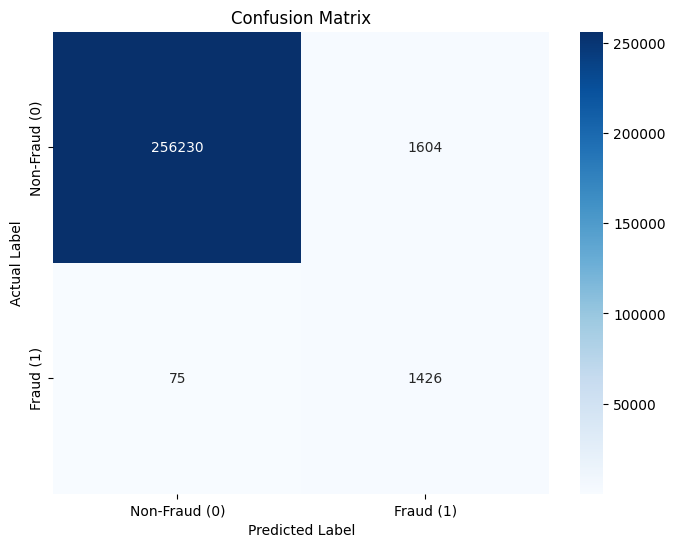

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
TN, FP, FN, TP = cm1.ravel()
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")

True Negatives: 256230
False Positives: 1604
False Negatives: 75
True Positives: 1426


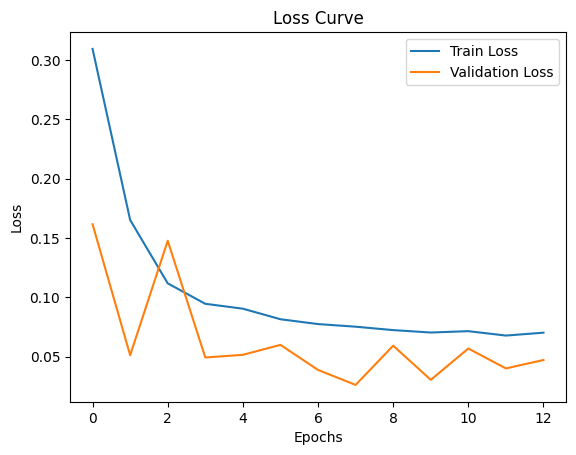

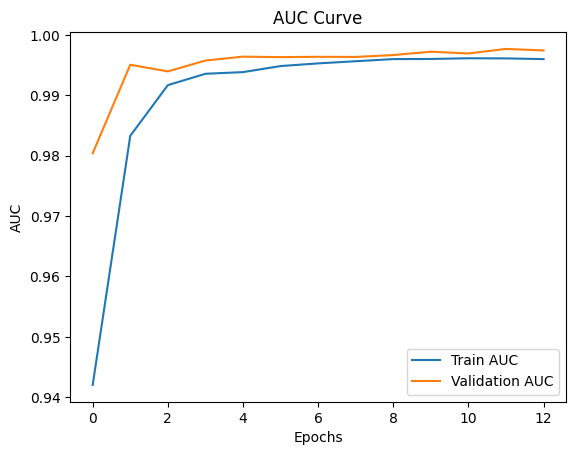

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# Plot AUC Curve
plt.plot(history.history['AUC'], label='Train AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC Curve')
plt.show()

# Model 1 prediction probabilities with decision threshold = 0.4

In [ ]:
# New decision threshold = 0.4
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob2 = model1.predict(X_test)
y_pred2 = (y_pred_prob2 > 0.4).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred2, digits=4))
print("Confusion Matrix:\n", cm2)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9928    0.9962    257834
           1     0.4351    0.9534    0.5975      1501

    accuracy                         0.9926    259335
   macro avg     0.7174    0.9731    0.7969    259335
weighted avg     0.9965    0.9926    0.9939    259335

Confusion Matrix:
 [[255976   1858]
 [    70   1431]]


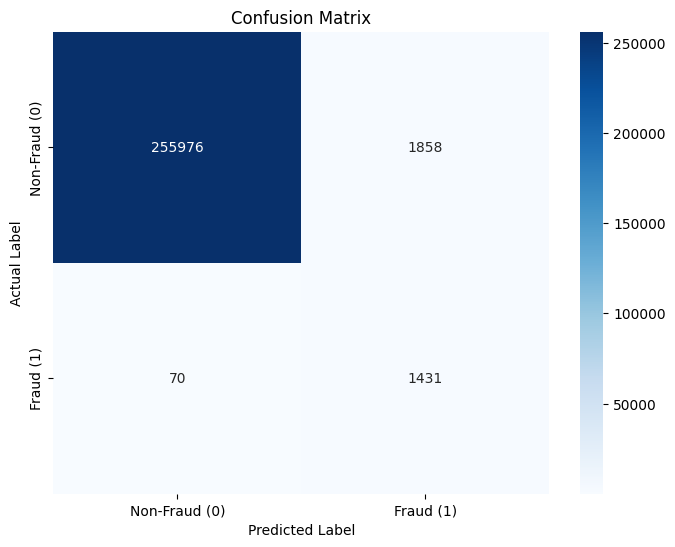

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Model 1 prediction probabilities with decision threshold = 0.6

In [ ]:
# New decision threshold = 0.6
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob3 = model1.predict(X_test)
y_pred3 = (y_pred_prob3 > 0.6).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred3, digits=4))
print("Confusion Matrix:\n", cm3)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9946    0.9971    257834
           1     0.5063    0.9427    0.6588      1501

    accuracy                         0.9943    259335
   macro avg     0.7530    0.9687    0.8280    259335
weighted avg     0.9968    0.9943    0.9952    259335

Confusion Matrix:
 [[256454   1380]
 [    86   1415]]


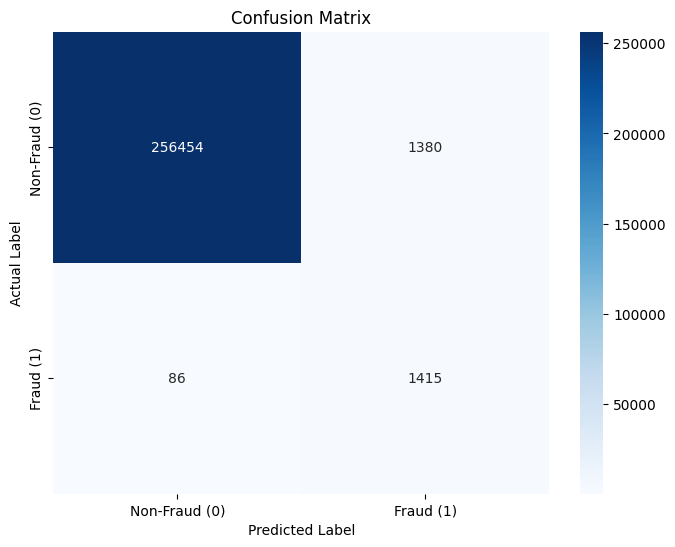

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# Model 1 with different class weights {0: 1, 1: 50}

In [ ]:
class_weights = {0: 1, 1: 50}  # Reduce fraud class weight

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Early stopping to stop training when validation loss stops improving.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1 = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights,  # Handles class imbalance
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - AUC: 0.8913 - accuracy: 0.8935 - loss: 0.4339 - val_AUC: 0.9838 - val_accuracy: 0.9606 - val_loss: 0.1018
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9831 - accuracy: 0.9767 - loss: 0.1667 - val_AUC: 0.9946 - val_accuracy: 0.9724 - val_loss: 0.0769
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - AUC: 0.9916 - accuracy: 0.9851 - loss: 0.1096 - val_AUC: 0.9939 - val_accuracy: 0.9953 - val_loss: 0.0187
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9929 - accuracy: 0.9873 - loss: 0.0948 - val_AUC: 0.9924 - val_accuracy: 0.9888 - val_loss: 0.0322
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9937 - accuracy: 0.9877 - loss: 0.0847 - val_AUC: 0.9964 - val_accuracy: 0.9928 - val_loss: 0.0242
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9956 - accuracy: 0.9888 - loss: 0.0758 - val_AUC: 0.9969 - val_accuracy: 0.9925 - val_loss: 0.0238
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = model1.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9955    0.9976    257834
           1     0.5495    0.9434    0.6945      1501

    accuracy                         0.9952    259335
   macro avg     0.7746    0.9694    0.8460    259335
weighted avg     0.9971    0.9952    0.9958    259335

Confusion Matrix:
 [[256673   1161]
 [    85   1416]]


In [ ]:
# Evaluate both
print("Evaluation for model trained with class_weights_dict:")
loss1, acc1, auc1 = model1_dict.evaluate(X_test, y_test)

print("Evaluation for model trained with class_weights:")
loss2, acc2, auc2 = model1_weights.evaluate(X_test, y_test)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,413 (193.02 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 32,644 (127.52 KB)

# ANN check with different class weights

In [ ]:
!pip install tensorflow
!pip install tensorflow-addons

In [ ]:
# Weights
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Common callback: Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define class weight dictionaries for imbalance handling
class_weights_list1 = [
    {0: 1, 1: 50},  # Model A
    {0: 1, 1: 55},  # Model B
    {0: 1, 1: 60},  # Model C
    {0: 1, 1: 65},  # Model D
    {0: 1, 1: 40},  # Model E
    {0: 1, 1: 20},  # Model F
    {0: 1, 1: 10},  # Model G
    {0: 1, 1: 5},  # Model H
]

In [ ]:
# Model A
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelA = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelA.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyA = modelA.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[0],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - AUC: 0.8931 - accuracy: 0.9005 - loss: 0.4323 - val_AUC: 0.9871 - val_accuracy: 0.9881 - val_loss: 0.0575
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9847 - accuracy: 0.9776 - loss: 0.1644 - val_AUC: 0.9944 - val_accuracy: 0.9817 - val_loss: 0.0641
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - AUC: 0.9911 - accuracy: 0.9846 - loss: 0.1119 - val_AUC: 0.9937 - val_accuracy: 0.9932 - val_loss: 0.0239
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - AUC: 0.9933 - accuracy: 0.9871 - loss: 0.0946 - val_AUC: 0.9960 - val_accuracy: 0.9949 - val_loss: 0.0170
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9946 - accuracy: 0.9882 - loss: 0.0835 - val_AUC: 0.9961 - val_accuracy: 0.9946 - val_loss: 0.0194
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - AUC: 0.9954 - accuracy: 0.9892 - loss: 0.0754 - val_AUC: 0.9955 - val_accuracy: 0.9827 - val_loss: 0.0473
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelA.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - AUC: 0.9957 - accuracy: 0.9950 - loss: 0.0170
Test Accuracy: 99.49139356613159
Test AUC: 0.9960


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelA.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
              precision    recall  f1-score   support

           0     0.9996    0.9953    0.9974    257834
           1     0.5347    0.9334    0.6799      1501

    accuracy                         0.9949    259335
   macro avg     0.7672    0.9643    0.8387    259335
weighted avg     0.9969    0.9949    0.9956    259335

Confusion Matrix:
 [[256615   1219]
 [   100   1401]]


In [ ]:
TN, FP, FN, TP = cm1.ravel()
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")

True Negatives: 256615
False Positives: 1219
False Negatives: 100
True Positives: 1401


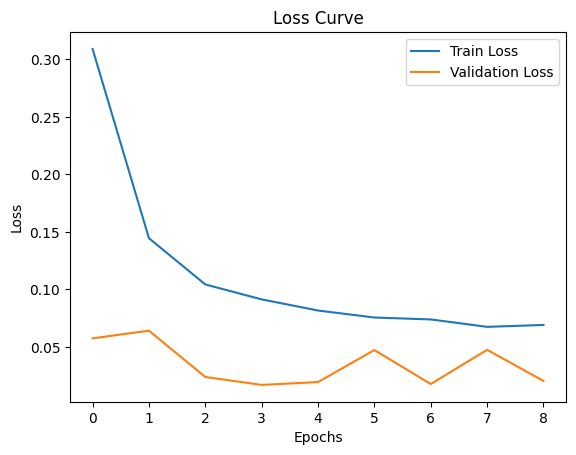

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.plot(historyA.history['loss'], label='Train Loss')
plt.plot(historyA.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

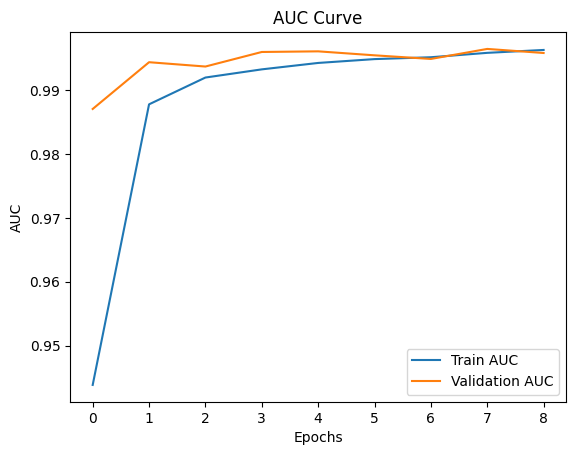

In [ ]:
# Plot AUC Curve
plt.plot(historyA.history['AUC'], label='Train AUC')
plt.plot(historyA.history['val_AUC'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC Curve')
plt.show()

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


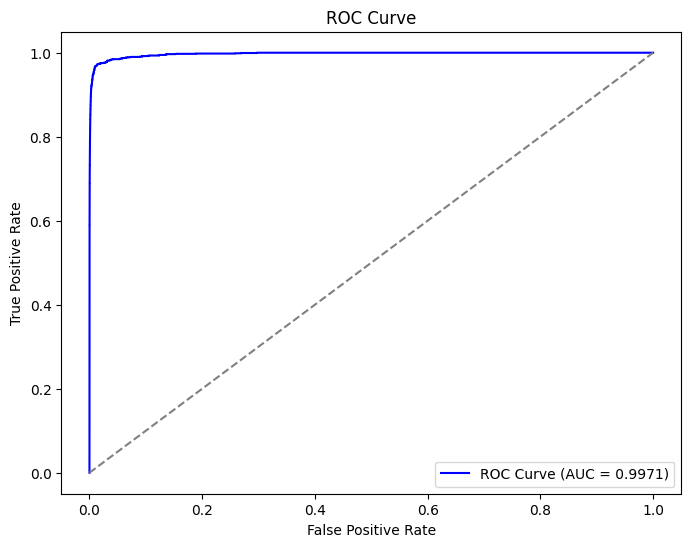

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_prob = modelA.predict(X_test)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Model B
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelB = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelB.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyB = modelB.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[1],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9939 - accuracy: 0.9879 - loss: 0.0908 - val_AUC: 0.9965 - val_accuracy: 0.9854 - val_loss: 0.0457
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - AUC: 0.9951 - accuracy: 0.9879 - loss: 0.0853 - val_AUC: 0.9961 - val_accuracy: 0.9868 - val_loss: 0.0389
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - AUC: 0.9954 - accuracy: 0.9892 - loss: 0.0807 - val_AUC: 0.9962 - val_accuracy: 0.9899 - val_loss: 0.0331
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - AUC: 0.9960 - accuracy: 0.9895 - loss: 0.0745 - val_AUC: 0.9959 - val_accuracy: 0.9942 - val_loss: 0.0199
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - AUC: 0.9953 - accuracy: 0.9901 - loss: 0.0782 - val_AUC: 0.9963 - val_accuracy: 0.9383 - val_loss: 0.1480
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - AUC: 0.9946 - accuracy: 0.9899 - loss: 0.0752 - val_AUC: 0.9968 - val_accuracy: 0.9851 - val_loss: 0.0438
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelB.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.9967 - accuracy: 0.9964 - loss: 0.0119
Test Accuracy: 99.63136315345764
Test AUC: 0.9957


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelB.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9996    0.9966    0.9981    257834
           1     0.6198    0.9394    0.7468      1501

    accuracy                         0.9963    259335
   macro avg     0.8097    0.9680    0.8725    259335
weighted avg     0.9974    0.9963    0.9967    259335

Confusion Matrix:
 [[256969    865]
 [    91   1410]]


In [ ]:
# Model C
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelC = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelC.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyC = modelC.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[2],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - AUC: 0.8930 - accuracy: 0.8836 - loss: 0.4790 - val_AUC: 0.9846 - val_accuracy: 0.9611 - val_loss: 0.1024
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - AUC: 0.9824 - accuracy: 0.9711 - loss: 0.1881 - val_AUC: 0.9925 - val_accuracy: 0.9908 - val_loss: 0.0396
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - AUC: 0.9913 - accuracy: 0.9838 - loss: 0.1192 - val_AUC: 0.9953 - val_accuracy: 0.9936 - val_loss: 0.0257
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - AUC: 0.9936 - accuracy: 0.9860 - loss: 0.1033 - val_AUC: 0.9966 - val_accuracy: 0.9935 - val_loss: 0.0244
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9943 - accuracy: 0.9865 - loss: 0.0984 - val_AUC: 0.9964 - val_accuracy: 0.9928 - val_loss: 0.0286
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - AUC: 0.9951 - accuracy: 0.9880 - loss: 0.0840 - val_AUC: 0.9959 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelC.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.9961 - accuracy: 0.9947 - loss: 0.0177
Test Accuracy: 99.48021173477173
Test AUC: 0.9969


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelC.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9951    0.9974    257834
           1     0.5286    0.9427    0.6774      1501

    accuracy                         0.9948    259335
   macro avg     0.7641    0.9689    0.8374    259335
weighted avg     0.9969    0.9948    0.9955    259335

Confusion Matrix:
 [[256572   1262]
 [    86   1415]]


In [ ]:
# Model D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelD = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelD.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyD = modelD.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[3],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - AUC: 0.8987 - accuracy: 0.8887 - loss: 0.4824 - val_AUC: 0.9838 - val_accuracy: 0.9772 - val_loss: 0.0867
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9817 - accuracy: 0.9691 - loss: 0.2070 - val_AUC: 0.9934 - val_accuracy: 0.9773 - val_loss: 0.0675
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - AUC: 0.9917 - accuracy: 0.9816 - loss: 0.1312 - val_AUC: 0.9961 - val_accuracy: 0.9909 - val_loss: 0.0364
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9933 - accuracy: 0.9844 - loss: 0.1092 - val_AUC: 0.9947 - val_accuracy: 0.9913 - val_loss: 0.0303
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9929 - accuracy: 0.9812 - loss: 0.1143 - val_AUC: 0.9953 - val_accuracy: 0.9921 - val_loss: 0.0273
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9952 - accuracy: 0.9863 - loss: 0.0945 - val_AUC: 0.9952 - val_accuracy: 0.9958 - val_loss: 0.0144
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelD.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - AUC: 0.9938 - accuracy: 0.9959 - loss: 0.0143
Test Accuracy: 99.5843231678009
Test AUC: 0.9952


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelD.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9996    0.9962    0.9979    257834
           1     0.5894    0.9287    0.7212      1501

    accuracy                         0.9958    259335
   macro avg     0.7945    0.9625    0.8595    259335
weighted avg     0.9972    0.9958    0.9963    259335

Confusion Matrix:
 [[256863    971]
 [   107   1394]]


In [ ]:
# Model E
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelE = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelE.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyE = modelE.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[4],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - AUC: 0.8944 - accuracy: 0.8735 - loss: 0.5268 - val_AUC: 0.9818 - val_accuracy: 0.9230 - val_loss: 0.1849
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - AUC: 0.9804 - accuracy: 0.9657 - loss: 0.2227 - val_AUC: 0.9941 - val_accuracy: 0.9735 - val_loss: 0.0858
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - AUC: 0.9922 - accuracy: 0.9821 - loss: 0.1325 - val_AUC: 0.9942 - val_accuracy: 0.9700 - val_loss: 0.0879
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - AUC: 0.9941 - accuracy: 0.9844 - loss: 0.1103 - val_AUC: 0.9952 - val_accuracy: 0.9927 - val_loss: 0.0247
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9943 - accuracy: 0.9851 - loss: 0.1086 - val_AUC: 0.9957 - val_accuracy: 0.9891 - val_loss: 0.0392
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9950 - accuracy: 0.9865 - loss: 0.0965 - val_AUC: 0.9962 - val_accuracy: 0.9943 - val_loss: 0.0202
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelE.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.9957 - accuracy: 0.9953 - loss: 0.0168
Test Accuracy: 99.52493906021118
Test AUC: 0.9971


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelE.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9997    0.9955    0.9976    257834
           1     0.5519    0.9534    0.6991      1501

    accuracy                         0.9952    259335
   macro avg     0.7758    0.9744    0.8483    259335
weighted avg     0.9971    0.9952    0.9959    259335

Confusion Matrix:
 [[256672   1162]
 [    70   1431]]


In [ ]:
# Model F
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelF = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelF.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyF = modelF.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[5],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - AUC: 0.8677 - accuracy: 0.9259 - loss: 0.2994 - val_AUC: 0.9848 - val_accuracy: 0.9895 - val_loss: 0.0434
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - AUC: 0.9821 - accuracy: 0.9885 - loss: 0.0981 - val_AUC: 0.9943 - val_accuracy: 0.9929 - val_loss: 0.0263
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9911 - accuracy: 0.9922 - loss: 0.0605 - val_AUC: 0.9924 - val_accuracy: 0.9938 - val_loss: 0.0206
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9927 - accuracy: 0.9923 - loss: 0.0550 - val_AUC: 0.9921 - val_accuracy: 0.9963 - val_loss: 0.0104
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9933 - accuracy: 0.9936 - loss: 0.0445 - val_AUC: 0.9932 - val_accuracy: 0.9970 - val_loss: 0.0087
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9936 - accuracy: 0.9937 - loss: 0.0448 - val_AUC: 0.9953 - val_accuracy: 0.9952 - val_loss: 0.0142
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelF.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.9876 - accuracy: 0.9976 - loss: 0.0070
Test Accuracy: 99.75436925888062
Test AUC: 0.9862


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelF.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9993    0.9982    0.9988    257834
           1     0.7432    0.8794    0.8056      1501

    accuracy                         0.9975    259335
   macro avg     0.8713    0.9388    0.9022    259335
weighted avg     0.9978    0.9975    0.9976    259335

Confusion Matrix:
 [[257378    456]
 [   181   1320]]


In [ ]:
# Model G
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelG = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelG.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyG = modelG.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[6],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - AUC: 0.8511 - accuracy: 0.9379 - loss: 0.2284 - val_AUC: 0.9871 - val_accuracy: 0.9947 - val_loss: 0.0213
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9811 - accuracy: 0.9930 - loss: 0.0607 - val_AUC: 0.9931 - val_accuracy: 0.9951 - val_loss: 0.0163
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9914 - accuracy: 0.9952 - loss: 0.0342 - val_AUC: 0.9849 - val_accuracy: 0.9974 - val_loss: 0.0075
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9906 - accuracy: 0.9955 - loss: 0.0309 - val_AUC: 0.9863 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9917 - accuracy: 0.9959 - loss: 0.0283 - val_AUC: 0.9886 - val_accuracy: 0.9968 - val_loss: 0.0102
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - AUC: 0.9912 - accuracy: 0.9962 - loss: 0.0283 - val_AUC: 0.9934 - val_accuracy: 0.9975 - val_loss: 0.0086
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelG.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.9860 - accuracy: 0.9975 - loss: 0.0076
Test Accuracy: 99.75822567939758
Test AUC: 0.9863


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelG.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
              precision    recall  f1-score   support

           0     0.9993    0.9983    0.9988    257834
           1     0.7489    0.8761    0.8075      1501

    accuracy                         0.9976    259335
   macro avg     0.8741    0.9372    0.9031    259335
weighted avg     0.9978    0.9976    0.9977    259335

Confusion Matrix:
 [[257393    441]
 [   186   1315]]


In [ ]:
# Model H
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelH = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelH.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyH = modelH.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[7],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - AUC: 0.8146 - accuracy: 0.9420 - loss: 0.1876 - val_AUC: 0.9794 - val_accuracy: 0.9967 - val_loss: 0.0121
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9811 - accuracy: 0.9955 - loss: 0.0352 - val_AUC: 0.9829 - val_accuracy: 0.9977 - val_loss: 0.0073
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - AUC: 0.9885 - accuracy: 0.9966 - loss: 0.0227 - val_AUC: 0.9708 - val_accuracy: 0.9980 - val_loss: 0.0068
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - AUC: 0.9883 - accuracy: 0.9969 - loss: 0.0200 - val_AUC: 0.9864 - val_accuracy: 0.9978 - val_loss: 0.0066
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - AUC: 0.9887 - accuracy: 0.9972 - loss: 0.0183 - val_AUC: 0.9911 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9908 - accuracy: 0.9972 - loss: 0.0172 - val_AUC: 0.9888 - val_accuracy: 0.9981 - val_loss: 0.0059
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelH.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.9892 - accuracy: 0.9988 - loss: 0.0040
Test Accuracy: 99.8750627040863
Test AUC: 0.9886


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelH.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
              precision    recall  f1-score   support

           0     0.9994    0.9994    0.9994    257834
           1     0.8916    0.8927    0.8921      1501

    accuracy                         0.9988    259335
   macro avg     0.9455    0.9461    0.9458    259335
weighted avg     0.9988    0.9988    0.9988    259335

Confusion Matrix:
 [[257671    163]
 [   161   1340]]


In [ ]:
TN, FP, FN, TP = cm1.ravel()
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")

True Negatives: 257671
False Positives: 163
False Negatives: 161
True Positives: 1340


In [ ]:
class_weights_list = [
    {0: 1, 1: 30}, # Model I
    {0: 1, 1: 45} # Model J
]

In [ ]:
# Model I
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelI = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelI.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyI = modelI.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list[0],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - AUC: 0.8807 - accuracy: 0.9144 - loss: 0.3572 - val_AUC: 0.9852 - val_accuracy: 0.9767 - val_loss: 0.0738
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - AUC: 0.9838 - accuracy: 0.9851 - loss: 0.1188 - val_AUC: 0.9957 - val_accuracy: 0.9936 - val_loss: 0.0288
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - AUC: 0.9928 - accuracy: 0.9903 - loss: 0.0740 - val_AUC: 0.9920 - val_accuracy: 0.9962 - val_loss: 0.0128
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9936 - accuracy: 0.9917 - loss: 0.0639 - val_AUC: 0.9965 - val_accuracy: 0.9849 - val_loss: 0.0482
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9939 - accuracy: 0.9918 - loss: 0.0613 - val_AUC: 0.9939 - val_accuracy: 0.9934 - val_loss: 0.0219
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9954 - accuracy: 0.9923 - loss: 0.0538 - val_AUC: 0.9956 - val_accuracy: 0.9936 - val_loss: 0.0192
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelI.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.9932 - accuracy: 0.9965 - loss: 0.0106
Test Accuracy: 99.65450167655945
Test AUC: 0.9940


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelI.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9996    0.9969    0.9983    257834
           1     0.6376    0.9340    0.7578      1501

    accuracy                         0.9965    259335
   macro avg     0.8186    0.9655    0.8780    259335
weighted avg     0.9975    0.9965    0.9969    259335

Confusion Matrix:
 [[257037    797]
 [    99   1402]]


In [ ]:
# Model J
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network architecture
modelJ = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.BatchNormalization(),  # Normalize activations
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
modelJ.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
historyJ = modelJ.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  # Start high, let early stopping decide
                    batch_size=256,  # Adjust based on hardware
                    class_weight=class_weights_list1[1],
                    callbacks=[early_stopping],  # Stop when no improvement
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - AUC: 0.8912 - accuracy: 0.8928 - loss: 0.4622 - val_AUC: 0.9839 - val_accuracy: 0.9701 - val_loss: 0.0936
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - AUC: 0.9831 - accuracy: 0.9741 - loss: 0.1770 - val_AUC: 0.9956 - val_accuracy: 0.9936 - val_loss: 0.0293
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.9925 - accuracy: 0.9848 - loss: 0.1107 - val_AUC: 0.9957 - val_accuracy: 0.9929 - val_loss: 0.0258
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - AUC: 0.9940 - accuracy: 0.9862 - loss: 0.0968 - val_AUC: 0.9962 - val_accuracy: 0.9891 - val_loss: 0.0365
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9945 - accuracy: 0.9884 - loss: 0.0838 - val_AUC: 0.9955 - val_accuracy: 0.9954 - val_loss: 0.0189
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - AUC: 0.9950 - accuracy: 0.9894 - loss: 0.0800 - val_AUC: 0.9979 - val_accuracy: 0.9937 - val_loss: 0.0219
Epoch 7/50
4053/4053 ━

In [ ]:
# Evaluate the model
loss, accuracy, auc = modelJ.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - AUC: 0.9961 - accuracy: 0.9963 - loss: 0.0122
Test Accuracy: 99.62519407272339
Test AUC: 0.9959


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob = modelJ.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9995    0.9967    0.9981    257834
           1     0.6187    0.9187    0.7394      1501

    accuracy                         0.9963    259335
   macro avg     0.8091    0.9577    0.8688    259335
weighted avg     0.9973    0.9963    0.9966    259335

Confusion Matrix:
 [[256984    850]
 [   122   1379]]


# Other Models

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Common callback: Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define class weight dictionaries for imbalance handling
class_weights_list = [
    {0: 1, 1: 30},  # Model 1
    {0: 1, 1: 35},  # Model 2
    {0: 1, 1: 38},  # Model 3
    {0: 1, 1: 40},  # Model 4
    {0: 1, 1: 45},  # Model 5
]

# Model 1

- Dropout: 30% → 20%
- Regularization: None
- Optimizer: Adam
- Activation: relu
- Loss Function: Binary Crossentropy
- Class Weights: {0: 1, 1: 30}

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Neural network architecture
model1 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification problem
              metrics=['accuracy', tf.keras.metrics.AUC(name="AUC")])  # Monitor AUC for fraud detection

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=256,
                    class_weight=class_weights_list[0],
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - AUC: 0.8801 - accuracy: 0.9120 - loss: 0.3463 - val_AUC: 0.9869 - val_accuracy: 0.9887 - val_loss: 0.0453
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9838 - accuracy: 0.9842 - loss: 0.1200 - val_AUC: 0.9931 - val_accuracy: 0.9931 - val_loss: 0.0262
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9921 - accuracy: 0.9900 - loss: 0.0722 - val_AUC: 0.9961 - val_accuracy: 0.9947 - val_loss: 0.0188
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - AUC: 0.9929 - accuracy: 0.9904 - loss: 0.0664 - val_AUC: 0.9949 - val_accuracy: 0.9960 - val_loss: 0.0140
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - AUC: 0.9950 - accuracy: 0.9926 - loss: 0.0526 - val_AUC: 0.9953 - val_accuracy: 0.9920 - val_loss: 0.0230
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.9946 - accuracy: 0.9924 - loss: 0.0539 - val_AUC: 0.9929 - val_accuracy: 0.9969 - val_loss: 0.0097
Epoch 7/50
4053/4053 ━

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob1 = model1.predict(X_test)
y_pred1 = (y_pred_prob1 > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred1, digits=4))
print("Confusion Matrix:\n", cm1)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9995    0.9974    0.9984    257834
           1     0.6716    0.9061    0.7714      1501

    accuracy                         0.9969    259335
   macro avg     0.8355    0.9517    0.8849    259335
weighted avg     0.9976    0.9969    0.9971    259335

Confusion Matrix:
 [[257169    665]
 [   141   1360]]


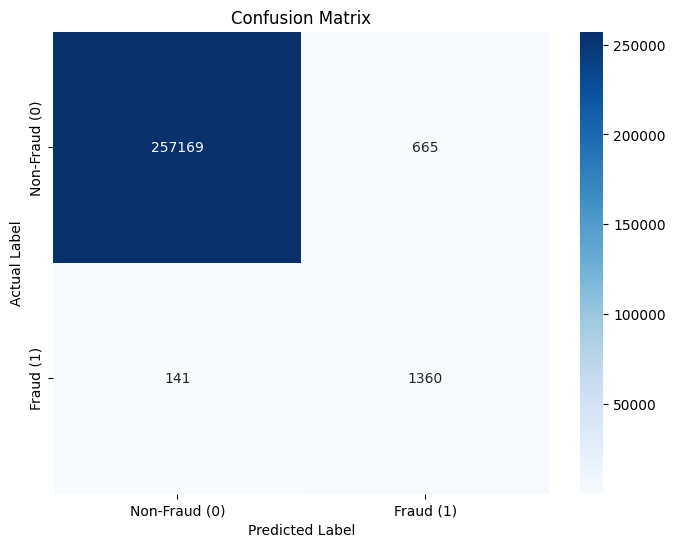

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

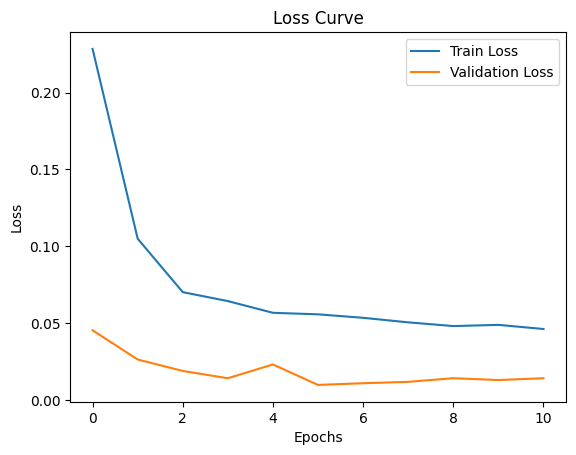

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

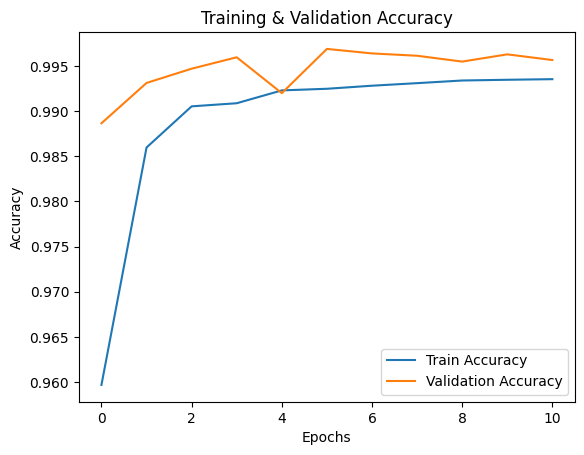

In [ ]:
# Plot training & validation accuracy
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.legend()

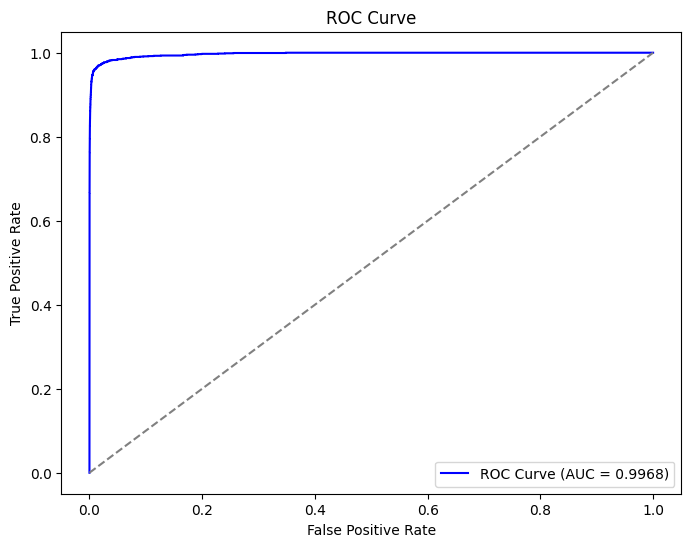

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

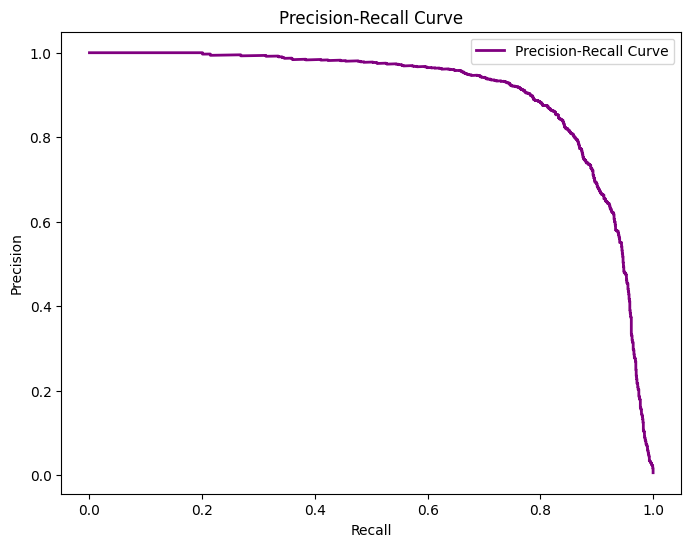

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob1)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy, auc = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy: .4f}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.4179 - accuracy: 0.0178 - loss: 0.7674
Test Accuracy:  0.0178
Test AUC: 0.4201


# Model 2

- Dropout: 20% → 15%
- Regularization: L2
- Optimizer: RMSprop
- Activation: elu
- Loss Function: Binary Crossentropy
- Class Weights: {0: 1, 1: 35}

In [ ]:
from tensorflow.keras import regularizers

model2 = keras.Sequential([
    layers.Dense(128, activation='elu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='elu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),

    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history2 = model2.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      batch_size=256,
                      class_weight=class_weights_list[1],
                      callbacks=[early_stopping],
                      verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9256 - auc: 0.9045 - loss: 0.4409 - val_accuracy: 0.9894 - val_auc: 0.9721 - val_loss: 0.1317
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9769 - auc: 0.9642 - loss: 0.2927 - val_accuracy: 0.9957 - val_auc: 0.9922 - val_loss: 0.1202
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9863 - auc: 0.9824 - loss: 0.2243 - val_accuracy: 0.9964 - val_auc: 0.9774 - val_loss: 0.1251
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9868 - auc: 0.9837 - loss: 0.2354 - val_accuracy: 0.9951 - val_auc: 0.9910 - val_loss: 0.1511
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9874 - auc: 0.9835 - loss: 0.2570 - val_accuracy: 0.9971 - val_auc: 0.9879 - val_loss: 0.1705
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9888 - auc: 0.9845 - loss: 0.2830 - val_accuracy: 0.9963 - val_auc: 0.9856 - val_loss: 0.2140
Epoch 7/50
4053/4053 ━

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob2 = model2.predict(X_test)
y_pred2 = (y_pred_prob2 > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred2, digits=4))
print("Confusion Matrix:\n", cm2)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
              precision    recall  f1-score   support

           0     0.9993    0.9964    0.9979    257834
           1     0.5877    0.8821    0.7054      1501

    accuracy                         0.9957    259335
   macro avg     0.7935    0.9392    0.8516    259335
weighted avg     0.9969    0.9957    0.9962    259335

Confusion Matrix:
 [[256905    929]
 [   177   1324]]


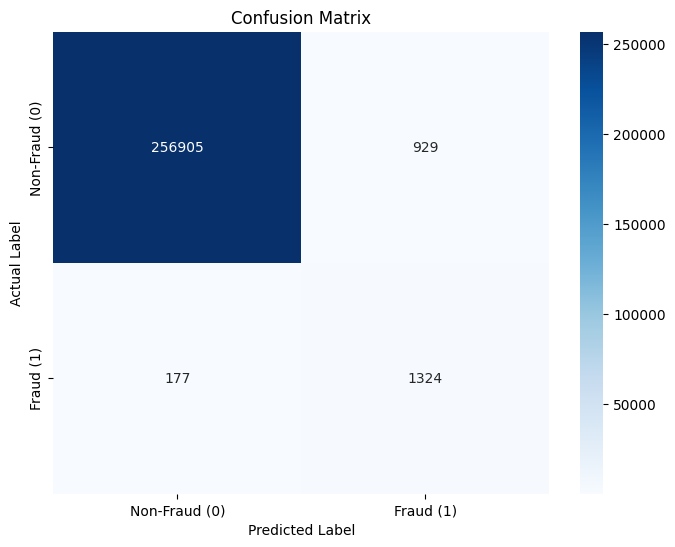

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

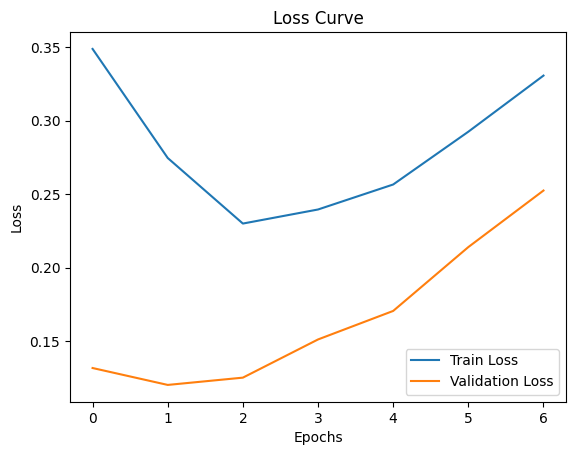

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

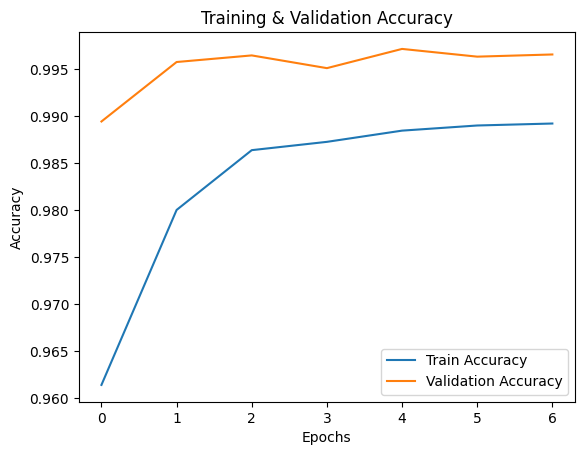

In [ ]:
# Plot training & validation accuracy
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.legend()

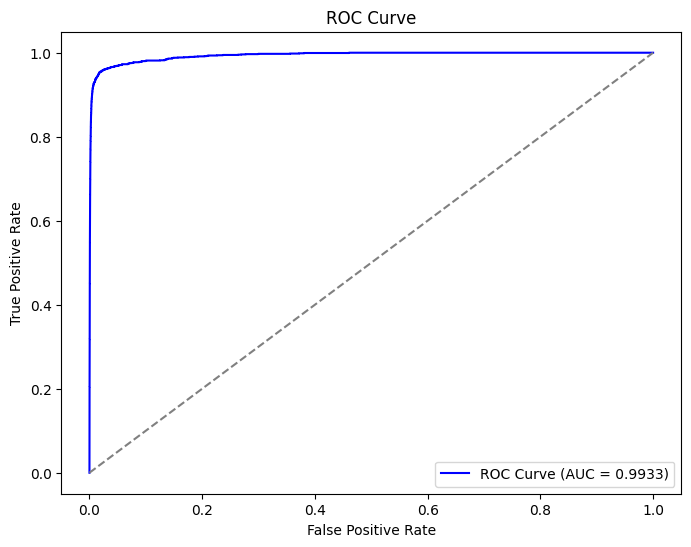

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob2)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

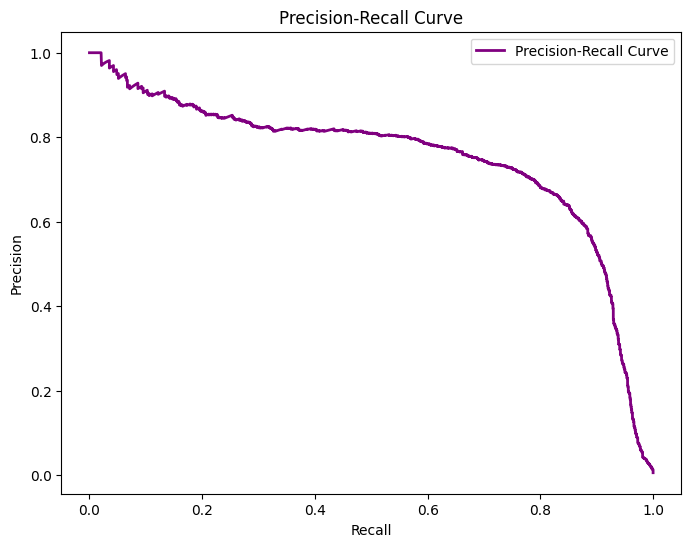

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob2)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy, auc = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.5098 - auc: 0.5774 - loss: 0.8407
Test Accuracy: 0.5093
Test AUC: 0.5834


# Model 3

- Dropout: 15% → 10%
- Regularization: L1
- Activation: Swish
- Optimizer: Adamax
- Loss Function: Log Cash
- Class Weights: {0: 1, 1: 38}


In [ ]:
model3 = keras.Sequential([
    layers.Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.001)),
    layers.Activation('swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),

    layers.Dense(128),
    layers.Activation('swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.15),

    layers.Dense(64),
    layers.Activation('swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='Adamax', loss=tf.keras.losses.LogCosh(), metrics=['accuracy', tf.keras.metrics.AUC()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history3 = model3.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      batch_size=256,
                      class_weight=class_weights_list[2],
                      callbacks=[early_stopping],
                      verbose=1)

NameError: name 'class_weights_list' is not defined

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob3 = model3.predict(X_test)
y_pred3 = (y_pred_prob3 > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred3, digits=4))
print("Confusion Matrix:\n", cm3)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
              precision    recall  f1-score   support

           0     0.9985    0.1159    0.2077    257834
           1     0.0064    0.9707    0.0126      1501

    accuracy                         0.1208    259335
   macro avg     0.5024    0.5433    0.1101    259335
weighted avg     0.9928    0.1208    0.2065    259335

Confusion Matrix:
 [[ 29879 227955]
 [    44   1457]]


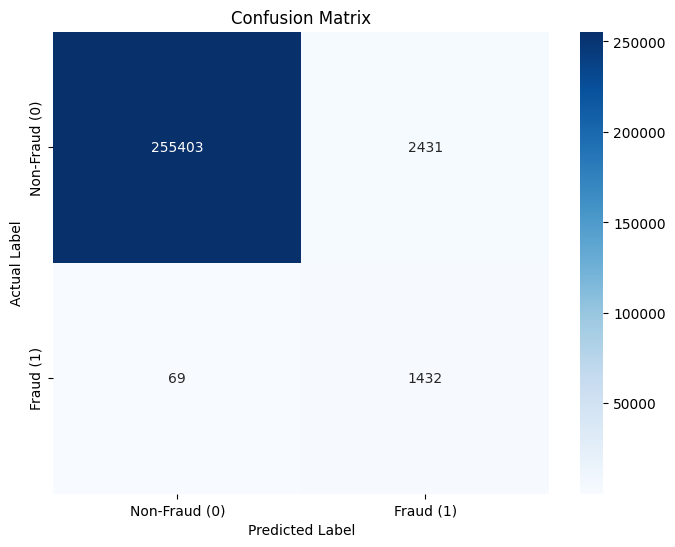

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

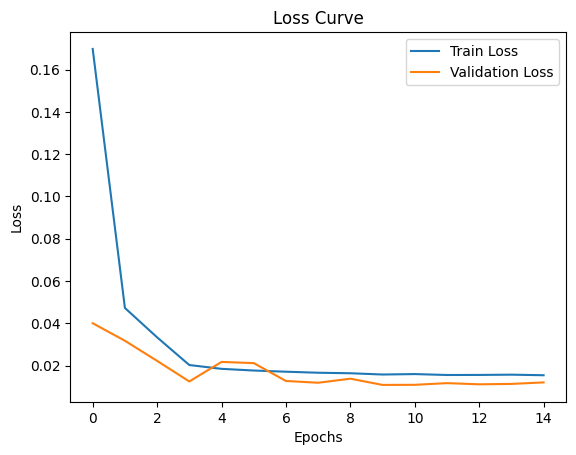

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

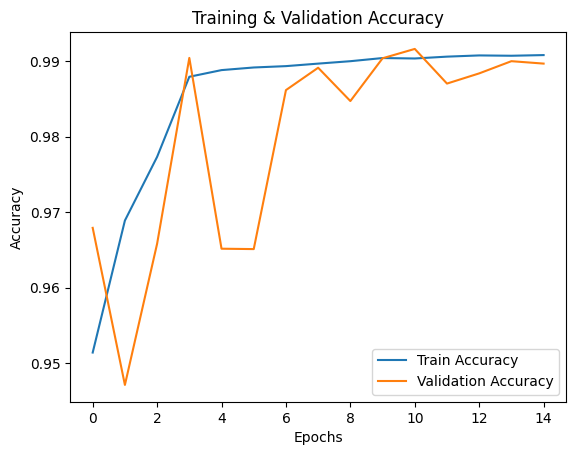

In [ ]:
# Plot training & validation accuracy
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob3)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'y_pred_prob3' is not defined

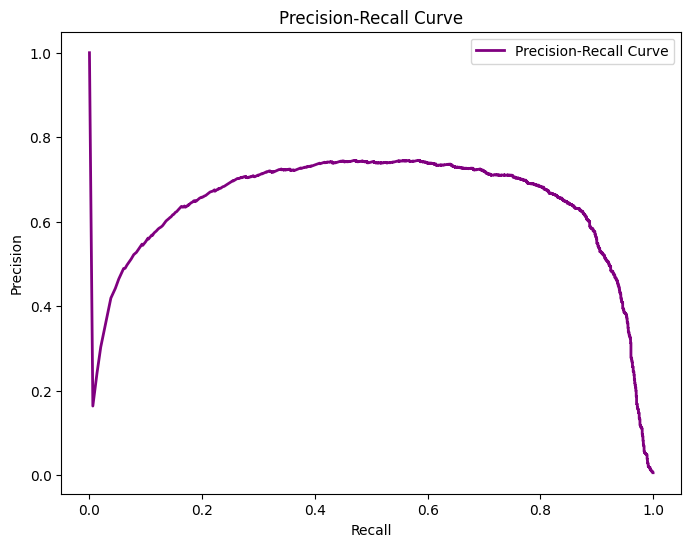

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob3)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy, auc = model3.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.2841 - auc_1: 0.4411 - loss: 0.8861
Test Accuracy: 0.2832
Test AUC: 0.4406


# Model 4

- Dropout: 30% → 10%
- Regularization: L1L2
- Optimizer: SGD (With Momentum)
- Loss Function: Focal Loss (For fraud detection)
- Class Weights: {0: 1, 1: 40}

In [ ]:
# import tensorflow_addons as tfa

# model4 = keras.Sequential([
#     layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.0005, l2=0.0005), input_shape=(X_train.shape[1],)),
#     layers.LeakyReLU(alpha=0.01),
#     layers.BatchNormalization(),
#     layers.Dropout(0.3),

#     layers.Dense(32),
#     layers.LeakyReLU(alpha=0.01),
#     layers.BatchNormalization(),
#     layers.Dropout(0.2),

#     layers.Dense(16),
#     layers.LeakyReLU(alpha=0.01),
#     layers.BatchNormalization(),
#     layers.Dropout(0.1),

#     layers.Dense(1, activation='sigmoid')
# ])

# model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
#                loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.25, gamma=2.0),
#                metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
# history4 = model4.fit(X_train, y_train,
#                       validation_data=(X_test, y_test),
#                       epochs=50,
#                       batch_size=256,
#                       class_weight=class_weights_list[3],
#                       callbacks=[early_stopping],
#                       verbose=1)

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# # Get model predictions (convert probabilities to binary labels)
# y_pred_prob4 = model4.predict(X_test)
# y_pred4 = (y_pred_prob4 > 0.5).astype(int)  # Convert to 0 or 1

# # Compute confusion matrix
# cm4 = confusion_matrix(y_test, y_pred4)

# # Print detailed classification report and confusion matrix
# print(classification_report(y_test, y_pred4, digits=4))
# print("Confusion Matrix:\n", cm4)

# Model 5

- Dropout: 30% → 10%
- Regularization: None
- Optimizer: Adam
- Activation Function: tanh
- Loss Function: Dice Loss
- Class Weights: {0: 1, 1: 45}

In [ ]:
import tensorflow.keras.backend as K

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

model5 = keras.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(1, activation='sigmoid')
])

model5.compile(optimizer='Adam', loss=dice_loss, metrics=['accuracy', tf.keras.metrics.AUC()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history5 = model5.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=50,
                      batch_size=256,
                      class_weight=class_weights_list[4],
                      callbacks=[early_stopping],
                      verbose=1)

Epoch 1/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9083 - auc_3: 0.7561 - loss: 1.0080 - val_accuracy: 0.9953 - val_auc_3: 0.7204 - val_loss: 0.6552
Epoch 2/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9941 - auc_3: 0.7263 - loss: 0.8189 - val_accuracy: 0.9961 - val_auc_3: 0.7066 - val_loss: 0.6486
Epoch 3/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9946 - auc_3: 0.7242 - loss: 0.7991 - val_accuracy: 0.9960 - val_auc_3: 0.7043 - val_loss: 0.6259
Epoch 4/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9956 - auc_3: 0.7062 - loss: 0.7074 - val_accuracy: 0.9960 - val_auc_3: 0.6585 - val_loss: 0.4963
Epoch 5/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9958 - auc_3: 0.6940 - loss: 0.6318 - val_accuracy: 0.9957 - val_auc_3: 0.7130 - val_loss: 0.4753
Epoch 6/50
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9958 - auc_3: 0.7006 - loss: 0.6210 - val_accuracy: 0.9960 - val_auc_3: 0.6652 - val_loss: 0.491

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get model predictions (convert probabilities to binary labels)
y_pred_prob5 = model5.predict(X_test)
y_pred5 = (y_pred_prob5 > 0.5).astype(int)  # Convert to 0 or 1

# Compute confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)

# Print detailed classification report and confusion matrix
print(classification_report(y_test, y_pred5, digits=4))
print("Confusion Matrix:\n", cm5)

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
              precision    recall  f1-score   support

           0     0.9966    0.9992    0.9979    257834
           1     0.7633    0.4211    0.5427      1501

    accuracy                         0.9959    259335
   macro avg     0.8800    0.7101    0.7703    259335
weighted avg     0.9953    0.9959    0.9953    259335

Confusion Matrix:
 [[257638    196]
 [   869    632]]


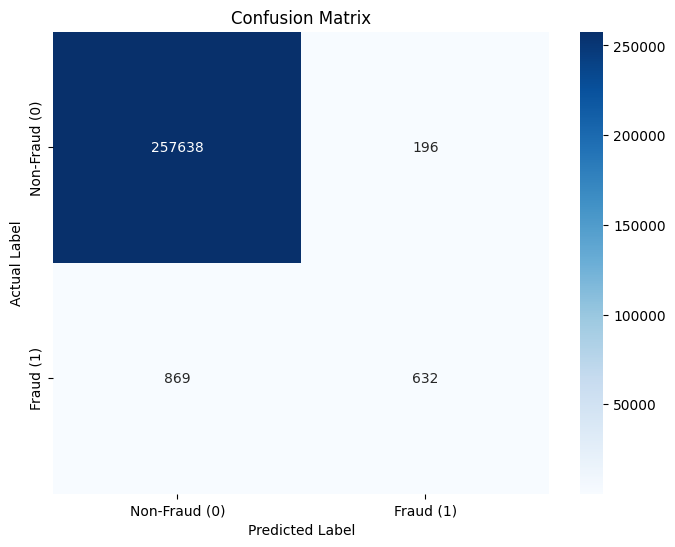

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud (0)", "Fraud (1)"], yticklabels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

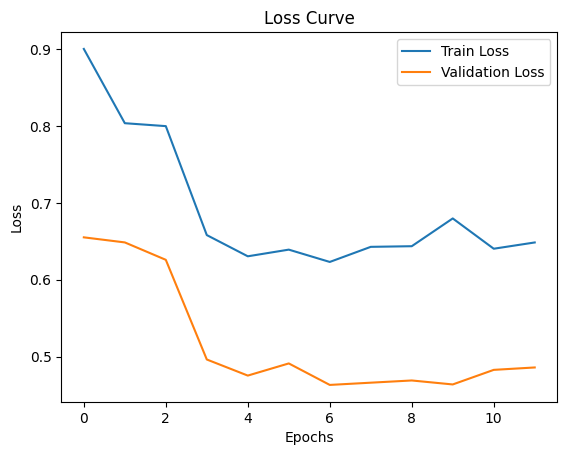

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.plot(history5.history['loss'], label='Train Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

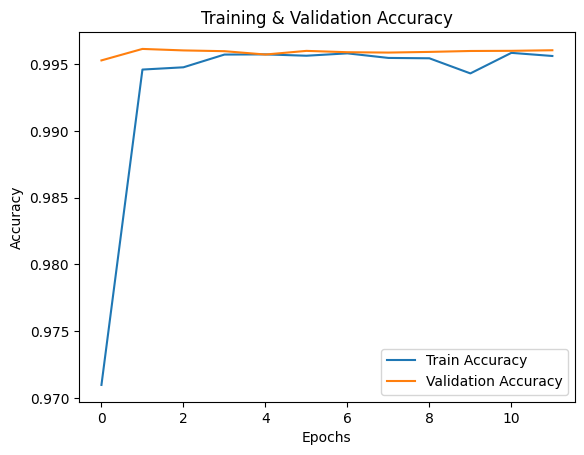

In [ ]:
# Plot training & validation accuracy
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob5)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

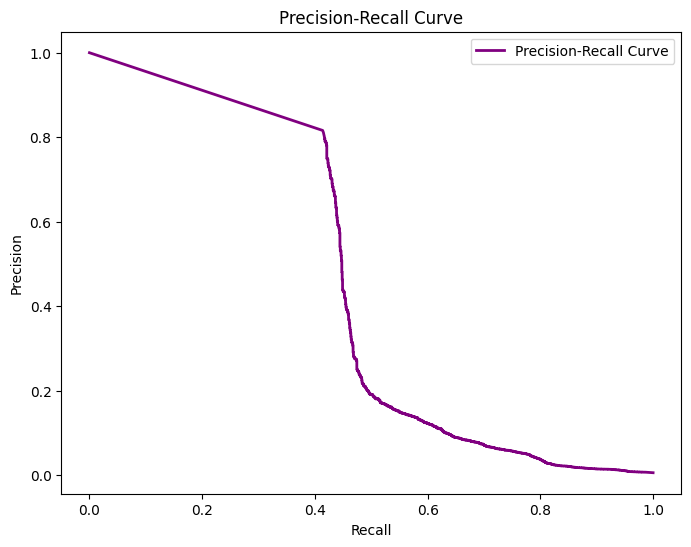

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob5)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy, auc = model5.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

8105/8105 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.2251 - auc_2: 0.3929 - loss: 0.9893
Test Accuracy: 0.2246
Test AUC: 0.3881


### Summary of Changes

| Model | Dropout  | Regularization  | Activation | Optimizer       | Loss Function        | Class Weights      | Batch Norm | No. of Neurons
|-------|---------|----------------|------------|----------------|----------------------|--------------------|--------------------|--------------------|
| 1     | 30% → 20%     | None           | ReLU       | Adam           | Binary Crossentropy  | `{0: 1, 1: 30}`    | Yes | (128, 64, 32) |
| 2     | 20% → 15%     | L2 (0.001)     | elu       | RMSprop        | Binary Crossentropy  | `{0: 1, 1: 35}`    | Yes | (128, 64, 32) |
| 3     | 15% → 10%     | L1 (0.001)     | Swish  | Adamax         | Log Cash | `{0: 1, 1: 38}`    | Yes | (256, 128, 64) |
| 4     | 30% → 10% | L1L2 (0.0005)  | ReLU       | SGD (Momentum) | Focal Loss           | `{0: 1, 1: 40}`    | Yes | (64, 32, 16) |
| 5     | 30% → 10% | None           | tanh       | Adam           | Dice Loss           | `{0: 1, 1: 45}`    | Yes | (128, 128, 64, 32) |